In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import talib
from talib import abstract
import warnings
warnings.filterwarnings("ignore")
from FinMind.data import DataLoader
from mpl_toolkits.mplot3d import Axes3D

In [5]:
# api = DataLoader()
# # api.login_by_token(api_token='token')
# # api.login(user_id='user_id',password='password')
# df_ii = api.taiwan_futures_institutional_investors(
#     data_id='TX',
#     start_date='2018-06-05',
# )

# # 将处理后的数据存成 CSV 文件


# df_ii.drop(['futures_id'], axis=1, inplace=True)
# df_ii.index = pd.to_datetime(df_ii.date)
# df_ii.drop(['date'], axis=1, inplace=True)

# # 将同一天的多行数据合并为单行
# df_ii_pivot = df_ii.pivot_table(index=df_ii.index, columns='institutional_investors', aggfunc='sum').reset_index()
# df_ii_pivot.columns = ['_'.join(col).strip() if col[1] else col[0] for col in df_ii_pivot.columns.values]
# df_ii_pivot.rename(columns={'index': 'date'}, inplace=True)
# df_ii_pivot.set_index('date', inplace=True)
# df_ii_pivot.to_csv('institutional_investors_data.csv')


2024-08-11 19:39:24.128 | INFO     | FinMind.data.finmind_api:get_data:125 - download Dataset.TaiwanFuturesInstitutionalInvestors, data_id: TX


In [6]:
# load institutional investors data
df_ii = pd.read_csv('institutional_investors_data.csv', index_col='date', parse_dates=True)

# 载入主要数据
file_path = 'TXF.pkl'
df = pd.read_pickle(file_path)

# 确保索引日期时间格式正确
df.index = pd.to_datetime(df.index)

# 处理 column 名称
df.drop(['簡稱', '期貨名稱'], axis=1, inplace=True)
df.columns = ['open', 'high', 'low', 'close', 'returns', 'volume', 'open_int', 'basis', 'tot_unsettled']
df.columns.drop(['basis', 'tot_unsettled'])

df.tail()

,open,high,low,close,returns,volume,open_int,basis,tot_unsettled
日期,,,,,,,,,
2024-07-02,22838.0,22993.0,22717.0,22831.0,-0.006872,104985,80084,44.37,87515
2024-07-03,23073.0,23188.0,22981.0,23185.0,0.015240,83985,82758,-10.57,90412
2024-07-04,23487.0,23626.0,23461.0,23624.0,0.018893,88198,83790,-98.47,91806
2024-07-05,23659.0,23677.0,23526.0,23570.0,-0.002117,60596,82017,-14.41,90567
2024-07-08,23545.0,23994.0,23512.0,23913.0,0.014340,107009,85253,-30.85,94312


In [7]:

# 截取2018-06-05 ~ 2024-08-09
# 合并两个数据框
df = pd.concat([df, df_ii], axis=1)
df = df[(df.index >= '2018-06-05') & (df.index <= '2024-07-08')]

df.head()


,open,high,low,close,returns,volume,open_int,basis,tot_unsettled,long_deal_amount_外資,...,short_deal_amount_自營商,short_deal_volume_外資,short_deal_volume_投信,short_deal_volume_自營商,short_open_interest_balance_amount_外資,short_open_interest_balance_amount_投信,short_open_interest_balance_amount_自營商,short_open_interest_balance_volume_外資,short_open_interest_balance_volume_投信,short_open_interest_balance_volume_自營商
2018-06-05,11101.0,11118.0,11035.0,11069.0,-0.001353,119504.0,92064.0,31.11,105924.0,96744874.0,...,36136490.0,44337.0,393.0,16344.0,54946371.0,57853235.0,23059521.0,24929.0,26133.0,10601.0
2018-06-06,11095.0,11210.0,11088.0,11200.0,0.011654,134205.0,98231.0,3.83,112680.0,122352058.0,...,55254918.0,46849.0,105.0,24824.0,50702057.0,57819753.0,32277896.0,22750.0,25817.0,14585.0
2018-06-07,11245.0,11253.0,11174.0,11227.0,0.002590,127407.0,94391.0,24.75,109476.0,116473656.0,...,36852701.0,55267.0,292.0,16482.0,53302760.0,58425308.0,28169463.0,23852.0,26020.0,12725.0
2018-06-08,11205.0,11215.0,11103.0,11125.0,-0.009085,122509.0,93056.0,31.42,108511.0,110244773.0,...,35906302.0,50896.0,547.0,16126.0,52929841.0,58946925.0,29420384.0,23902.0,26493.0,13416.0
2018-06-11,11151.0,11173.0,11098.0,11128.0,0.000270,104423.0,92478.0,21.23,108428.0,103962131.0,...,33125032.0,47318.0,199.0,14911.0,53638811.0,59111936.0,30207913.0,24220.0,26560.0,13766.0


In [21]:
# 计算三大法人的总多单和空单
df['large_long_positions'] = df[['long_open_interest_balance_volume_自營商', 'long_open_interest_balance_volume_投信', 'long_open_interest_balance_volume_外資']].sum(axis=1)
df['large_short_positions'] = df[['short_open_interest_balance_volume_自營商', 'short_open_interest_balance_volume_投信', 'short_open_interest_balance_volume_外資']].sum(axis=1)

df['large_long_amount'] = df[['long_open_interest_balance_amount_外資', 'long_open_interest_balance_amount_投信', 'long_open_interest_balance_amount_外資']].sum(axis=1)
df['large_short_amount'] = df[['short_open_interest_balance_amount_外資', 'short_open_interest_balance_amount_投信', 'short_open_interest_balance_amount_外資']].sum(axis=1)

# 计算散户的多单和空单
df['retail_long_positions'] = df['open_int'] - df['large_long_positions']
df['retail_short_positions'] = df['open_int'] - df['large_short_positions']

# 计算散户多空比
df['retail_long_short_ratio'] = (df['retail_long_positions'] - df['retail_short_positions']) / df['open_int']

# 計算三大法人的多空比
df['FA_long_short_ratio'] = -df['retail_long_short_ratio']


df.columns


Index(['open', 'high', 'low', 'close', 'returns', 'volume', 'open_int',
       'basis', 'tot_unsettled', 'long_deal_amount_外資', 'long_deal_amount_投信',
       'long_deal_amount_自營商', 'long_deal_volume_外資', 'long_deal_volume_投信',
       'long_deal_volume_自營商', 'long_open_interest_balance_amount_外資',
       'long_open_interest_balance_amount_投信',
       'long_open_interest_balance_amount_自營商',
       'long_open_interest_balance_volume_外資',
       'long_open_interest_balance_volume_投信',
       'long_open_interest_balance_volume_自營商', 'short_deal_amount_外資',
       'short_deal_amount_投信', 'short_deal_amount_自營商', 'short_deal_volume_外資',
       'short_deal_volume_投信', 'short_deal_volume_自營商',
       'short_open_interest_balance_amount_外資',
       'short_open_interest_balance_amount_投信',
       'short_open_interest_balance_amount_自營商',
       'short_open_interest_balance_volume_外資',
       'short_open_interest_balance_volume_投信',
       'short_open_interest_balance_volume_自營商', 'large_long_po

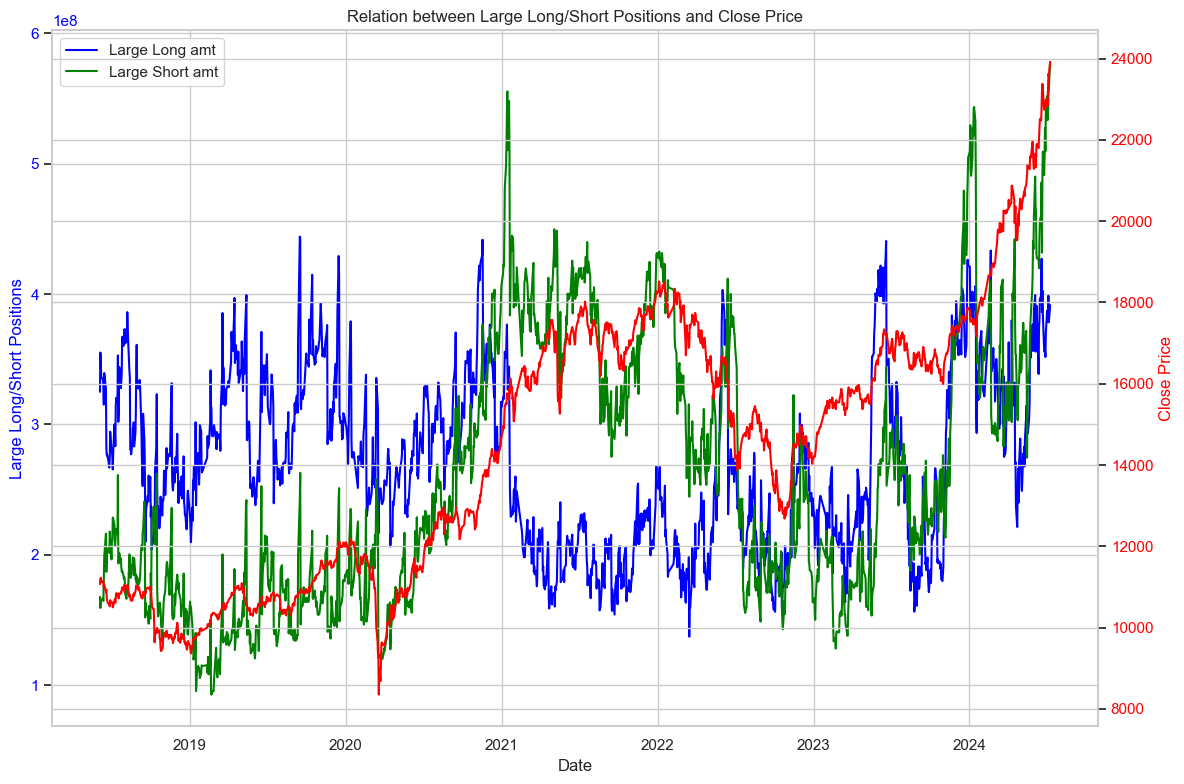

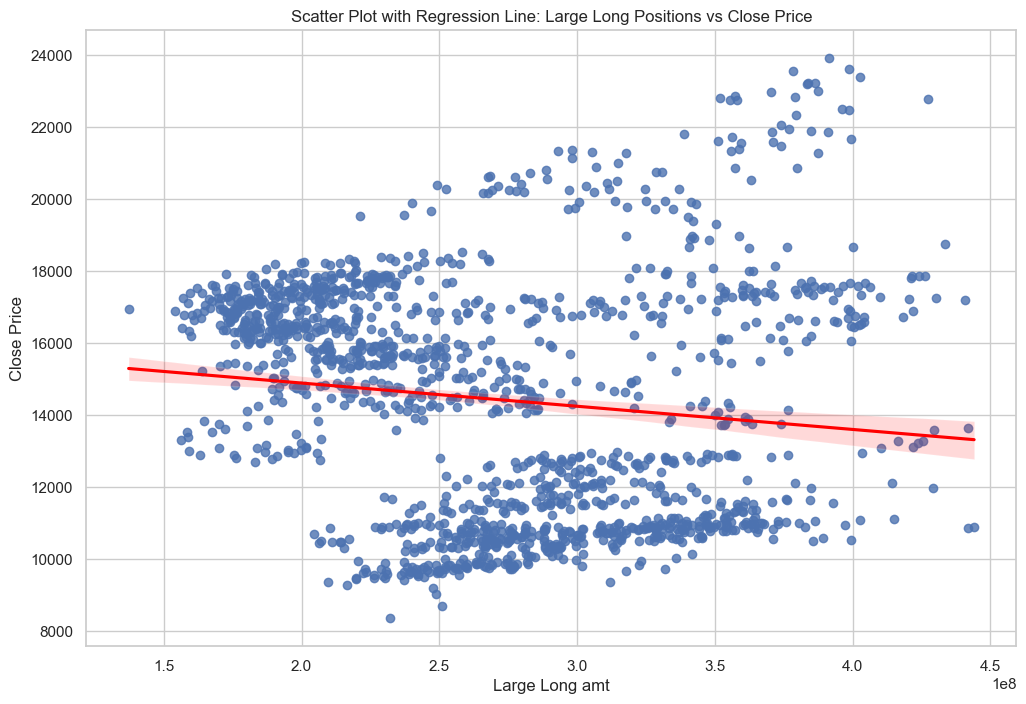

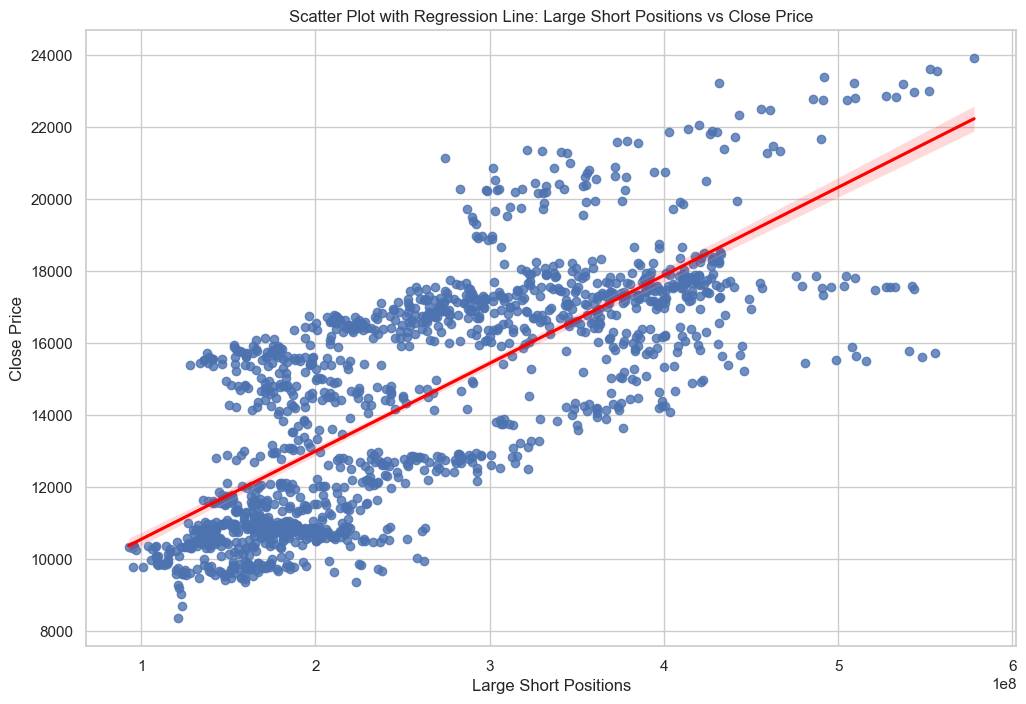

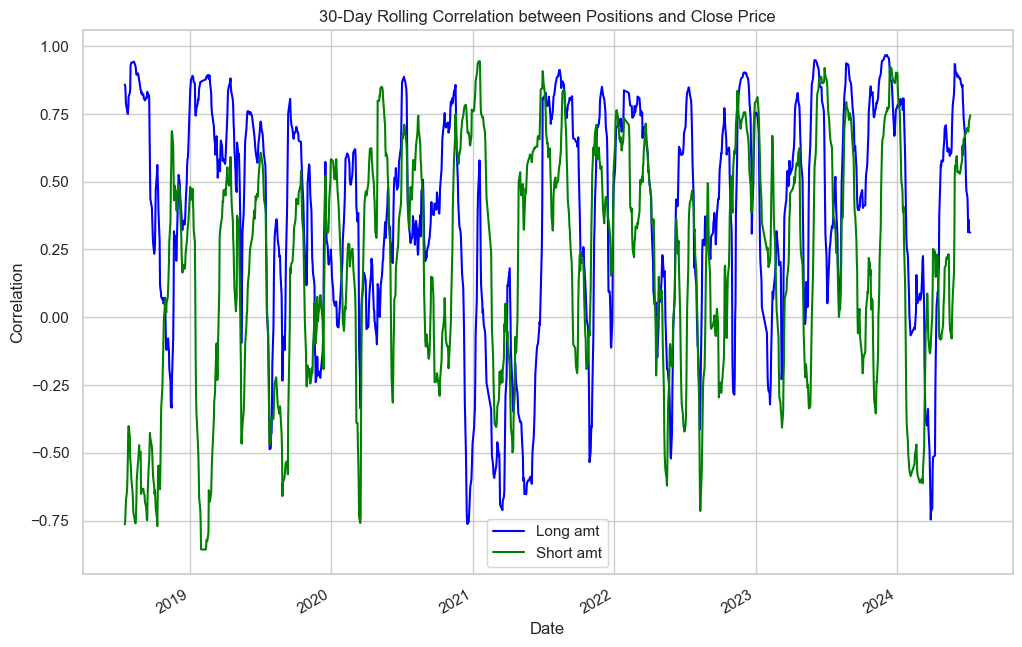

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure Seaborn styles are applied for better aesthetics
sns.set(style="whitegrid")

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot large_long_positions on the primary y-axis
ax1.plot(df.index, df['large_long_amount'], color='blue', label='Large Long amt')
ax1.set_xlabel('Date')
ax1.set_ylabel('Large Long/Short amount', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Plot large_short_positions on the same primary y-axis
ax1.plot(df.index, df['large_short_amount'], color='green', label='Large Short amt')
ax1.legend(loc='upper left')

# Create a secondary y-axis and plot the close prices
ax2 = ax1.twinx()
ax2.plot(df.index, df['close'], color='red', label='Close Price')
ax2.set_ylabel('Close Price', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add a title
plt.title('Relation between Large Long/Short Positions and Close Price')
fig.tight_layout()

# Show the plot
plt.show()

# Scatter plot with regression line for large_long_positions vs close
plt.figure(figsize=(12, 8))
sns.regplot(x=df['large_long_amount'], y=df['close'], line_kws={"color":"red"})
plt.title('Scatter Plot with Regression Line: Large Long amount vs Close Price')
plt.xlabel('Large Long amt')
plt.ylabel('Close Price')
plt.show()

# Scatter plot with regression line for large_short_positions vs close
plt.figure(figsize=(12, 8))
sns.regplot(x=df['large_short_amount'], y=df['close'], line_kws={"color":"red"})
plt.title('Scatter Plot with Regression Line: Large Short Positions vs Close Price')
plt.xlabel('Large Short Positions')
plt.ylabel('Close Price')
plt.show()

# Calculate rolling correlation between close and large_long_positions
rolling_corr_long = df['large_long_amount'].rolling(window=30).corr(df['close'])

# Calculate rolling correlation between close and large_short_positions
rolling_corr_short = df['large_short_amount'].rolling(window=30).corr(df['close'])

# Plot the rolling correlations
plt.figure(figsize=(12, 8))
rolling_corr_long.plot(label='Long amt', color='blue')
rolling_corr_short.plot(label='Short amt', color='green')
plt.title('30-Day Rolling Correlation between Positions and Close Price')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.legend()
plt.show()


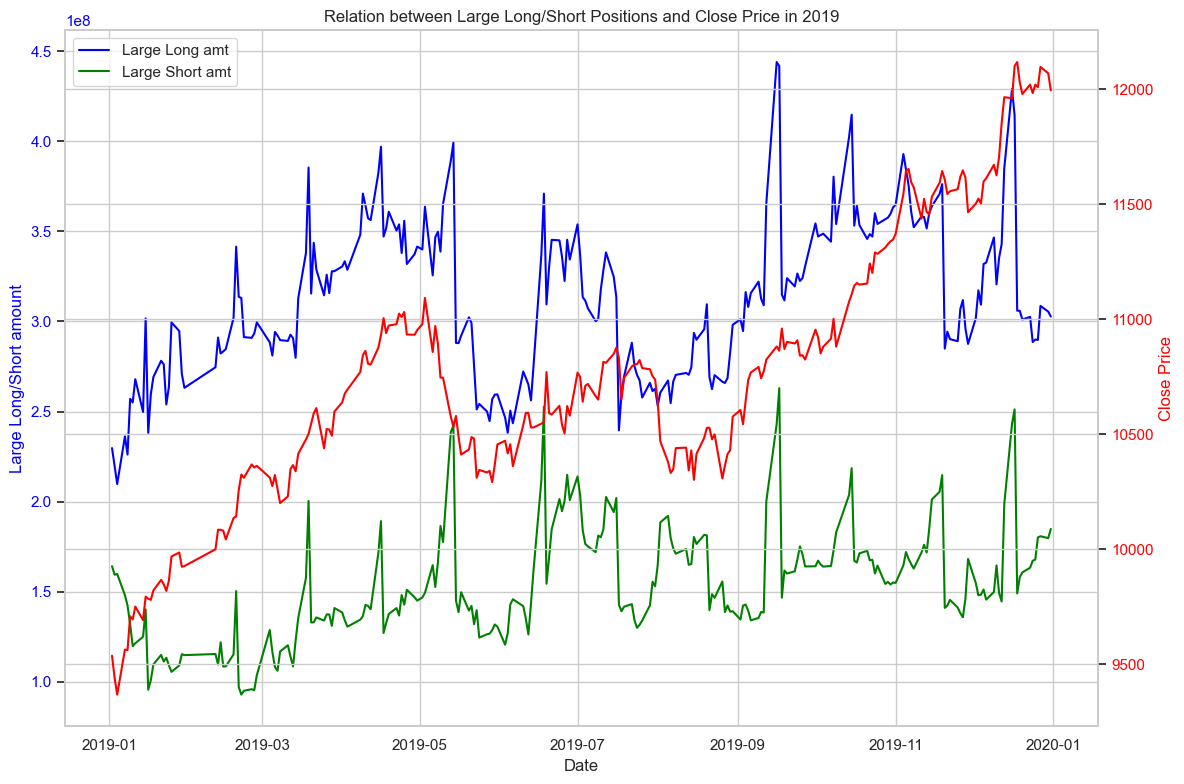

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 確保 Seaborn 樣式已經應用
sns.set(style="whitegrid")

# 假設 df 已經有日期索引，並且是 datetime 格式
# 如果日期不是 datetime 格式，請先轉換：
# df.index = pd.to_datetime(df.index)

# 篩選特定年份的數據，例如2019年
df_2019 = df[df.index.year == 2019]

# 創建圖形和軸
fig, ax1 = plt.subplots(figsize=(12, 8))

# 繪製 large_long_amount 在主 y 軸上
ax1.plot(df_2019.index, df_2019['large_long_amount'], color='blue', label='Large Long amt')
ax1.set_xlabel('Date')
ax1.set_ylabel('Large Long/Short amount', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 在主 y 軸上繪製 large_short_amount
ax1.plot(df_2019.index, df_2019['large_short_amount'], color='green', label='Large Short amt')
ax1.legend(loc='upper left')

# 創建次要 y 軸並繪製收盤價
ax2 = ax1.twinx()
ax2.plot(df_2019.index, df_2019['close'], color='red', label='Close Price')
ax2.set_ylabel('Close Price', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# 添加標題
plt.title('Relation between Large Long/Short Positions and Close Price in 2019')
fig.tight_layout()

# 顯示圖形
plt.show()




In [24]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import datetime as dt
import time
import pickle as pkl
import warnings

# 忽略所有警告
warnings.filterwarnings("ignore")

plt.style.use('ggplot')
# pd.set_option('display.max_rows', None)

### Train, test

In [25]:
trainData = df[(df.index >= '2018-06-05') & (df.index <= '2022-06-30')].copy()

testData = df[(df.index >= '2022-07-01') & (df.index <= '2024-07-08')].copy()

# 如果需要，可以显示数据切分后的信息
print(f"Train Data Range: {trainData.index.min()} to {trainData.index.max()}")
print(f"Test Data Range: {testData.index.min()} to {testData.index.max()}")


Train Data Range: 2018-06-05 00:00:00 to 2022-06-30 00:00:00
Test Data Range: 2022-07-01 00:00:00 to 2024-07-08 00:00:00


In [26]:
from datetime import datetime
settlementDate= pd.read_csv('settlementDate.csv')

settlementDate.columns = ['settlementDate', 'futures', 'settlementPrice']
bool_ = [False if 'W' in i else True for i in settlementDate['futures']]
settlementDate = [i.replace('/','-') for i in list(settlementDate[bool_]['settlementDate'])]
settlementDate = [pd.to_datetime(i).date() for i in settlementDate]




## Strat 2: 三大法態度判斷

### logic
外資多單數量增加且空單數量減少：進場買入（看多）。
外資空單數量增加且多單數量減少：進場賣出（看空）。
外資多單數量減少且空單數量增加：出場賣出（結束看多）。
外資空單數量減少且多單數量增加：出場買入（結束看空）。

In [27]:
fund = 1000000
feePaid = 600
length = 15   # window length 
NumStd = 1.5  # 布林 上下界使用幾個標準差
K = 0.1 # K 用於布林帶策略中的止損計算

In [28]:
trainData['MA'] = trainData['close'].rolling(window=length, center=False).mean()
trainData['STD'] = trainData['close'].rolling(window=length, center=False).std()
trainData['upLine'] = trainData['MA'] + NumStd*trainData['STD']#布林通道用
trainData['downLine'] = trainData['MA'] - NumStd*trainData['STD']

trainData.head(3)

,open,high,low,close,returns,volume,open_int,basis,tot_unsettled,long_deal_amount_外資,...,retail_long_positions,retail_short_positions,retail_long_short_ratio,FA_long_short_ratio,large_long_amount,large_short_amount,MA,STD,upLine,downLine
2018-06-05,11101.0,11118.0,11035.0,11069.0,-0.001353,119504.0,92064.0,31.11,105924.0,96744874.0,...,9308.0,30401.0,-0.229112,0.229112,325066469.0,167745977.0,NaN,NaN,NaN,NaN
2018-06-06,11095.0,11210.0,11088.0,11200.0,0.011654,134205.0,98231.0,3.83,112680.0,122352058.0,...,9626.0,35079.0,-0.259114,0.259114,355195519.0,159223867.0,NaN,NaN,NaN,NaN
2018-06-07,11245.0,11253.0,11174.0,11227.0,0.002590,127407.0,94391.0,24.75,109476.0,116473656.0,...,8570.0,31794.0,-0.246040,0.246040,346329446.0,165030828.0,NaN,NaN,NaN,NaN


## Find Best Threshold 

In [ ]:
# # 應用最佳參數到測試數據集
# best_entry_threshold =  -0.05
# best_exit_threshold =  0.05

# PC_test = putCall(test, best_entry_threshold, best_exit_threshold)   # strat 1 
# PC_val = putCall(validation, best_entry_threshold,  best_exit_threshold)
# # FI_test = foreign_investors(test)  # strat 2 


In [ ]:
# PC_test['strategy_ret'] = PC_test['signal'].shift(1) * PC_test['position_size'].shift(1) * PC_test['close'].pct_change()
# PC_test['strategy_ret'].fillna(0, inplace=True)
# PC_test['cum_strategy_ret'] = (1 + PC_test['strategy_ret']).cumprod() - 1
# PC_test['ret'] = PC_test['close'].pct_change()
# PC_test['cum_ret'] = PC_test['ret'].cumsum()


# PC_val['strategy_ret'] = PC_val['signal'].shift(1) * PC_val['position_size'].shift(1) * PC_val['close'].pct_change()
# PC_val['strategy_ret'].fillna(0, inplace=True)
# PC_val['cum_strategy_ret'] = (1 + PC_val['strategy_ret']).cumprod() - 1

# # FI_test['strategy_ret'] = FI_test['signal'].shift(1) * FI_test['position_size'].shift(1) * FI_test['close'].pct_change()
# # FI_test['strategy_ret'].fillna(0, inplace=True)
# # FI_test['cum_strategy_ret'] = (1 + FI_test['strategy_ret']).cumprod() - 1
# # FI_test.tail()

# PC_test.head()


## Performance Matrix 

Buy Price: 9980.0, time: 2018-11-08 00:00:00
Sell Price: 9600.0, time: 2018-11-13 00:00:00
Trade completed

Buy Price: 9755.0, time: 2018-11-20 00:00:00
Sell Price: 9766.0, time: 2018-11-22 00:00:00
Trade completed

Buy Price: 10123.0, time: 2019-02-19 00:00:00
Sell Price: 10255.0, time: 2019-02-21 00:00:00
Trade completed

Buy Price: 10483.0, time: 2019-03-19 00:00:00
Sell Price: 10538.0, time: 2019-03-21 00:00:00
Trade completed

Buy Price: 10450.0, time: 2019-03-28 00:00:00
Sell Price: 10679.0, time: 2019-04-01 00:00:00
Trade completed

Buy Price: 10679.0, time: 2019-04-01 00:00:00
Sell Price: 10779.0, time: 2019-04-08 00:00:00
Trade completed

Buy Price: 10870.0, time: 2019-04-16 00:00:00
Sell Price: 11022.0, time: 2019-04-18 00:00:00
Trade completed

Buy Price: 10425.0, time: 2019-05-14 00:00:00
Sell Price: 10537.0, time: 2019-05-16 00:00:00
Trade completed

Buy Price: 10477.0, time: 2019-06-17 00:00:00
Sell Price: 10575.0, time: 2019-06-20 00:00:00
Trade completed

Buy Price: 103

                           Strategy
-------------------------  ----------
Start Period               2018-11-12
End Period                 2024-07-08
Risk-Free Rate             0.0%
Time in Market             11.0%

Cumulative Return          -53.74%
CAGR﹪                     -8.98%

Sharpe                     0.54
Prob. Sharpe Ratio         93.97%
Smart Sharpe               0.5
Sortino                    1.3
Smart Sortino              1.19
Sortino/√2                 0.92
Smart Sortino/√2           0.84
Omega                      1.69

Max Drawdown               -336.92%
Longest DD Days            1219
Volatility (ann.)          842.86%
Calmar                     -0.03
Skew                       11.71
Kurtosis                   241.45

Expected Daily %           -0.06%
Expected Monthly %         -1.11%
Expected Yearly %          -10.43%
Kelly Criterion            19.88%
Risk of Ruin               0.0%
Daily Value-at-Risk        -85.51%
Expected Shortfall (cVaR)  -85.51%

Max Consecutiv

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2020-06-16,2021-01-15,2023-10-17,1219,-336.923077,-266.346154
2,2018-11-22,2019-12-19,2020-04-30,526,-258.249158,-252.525253
3,2024-06-06,2024-06-20,2024-07-08,33,-94.628752,-79.067930
4,2023-11-15,2023-12-15,2024-01-02,49,-72.231986,-54.833040
5,2020-05-19,2020-05-19,2020-06-11,24,-50.306748,NaN


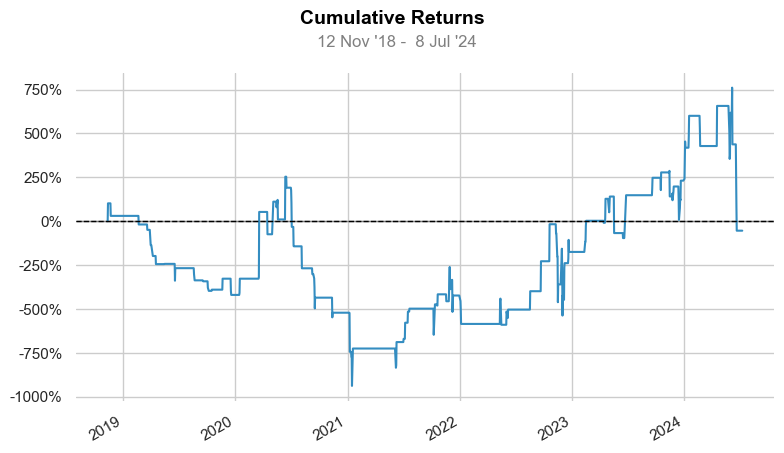

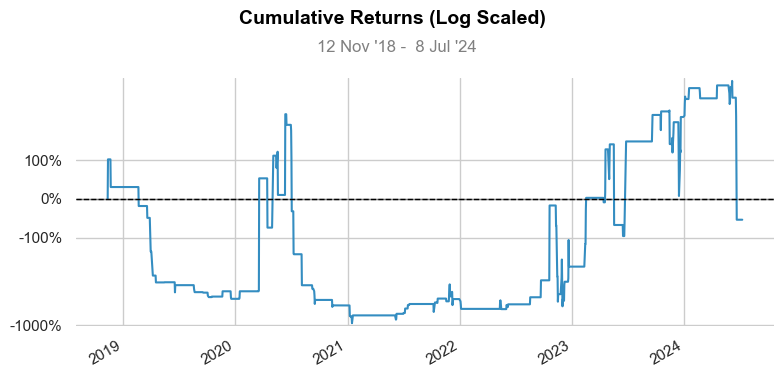

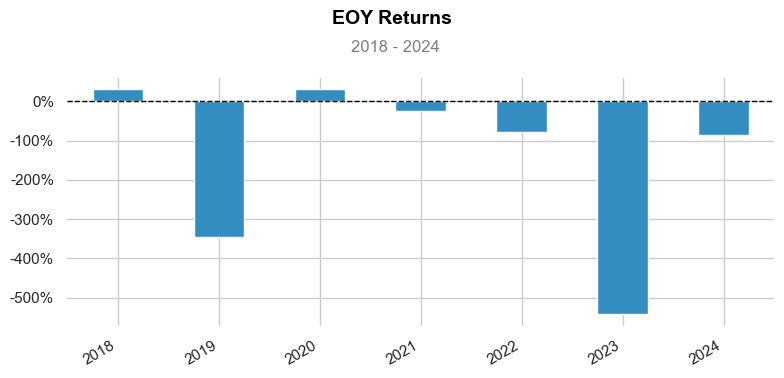

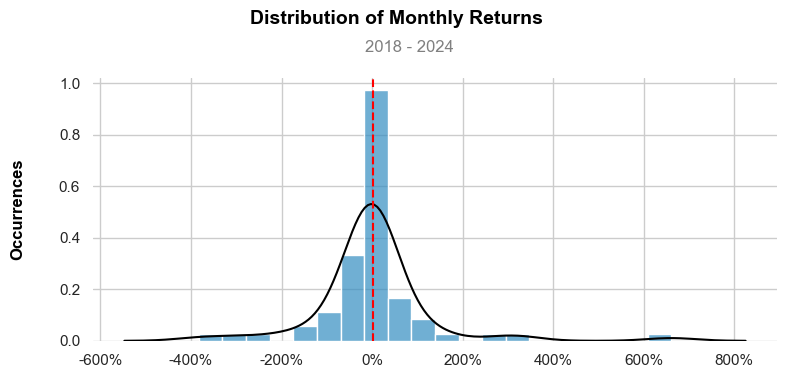

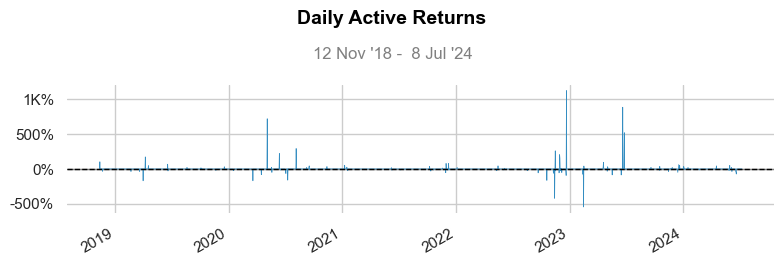

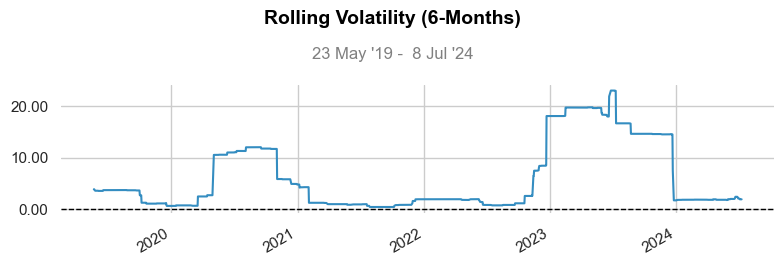

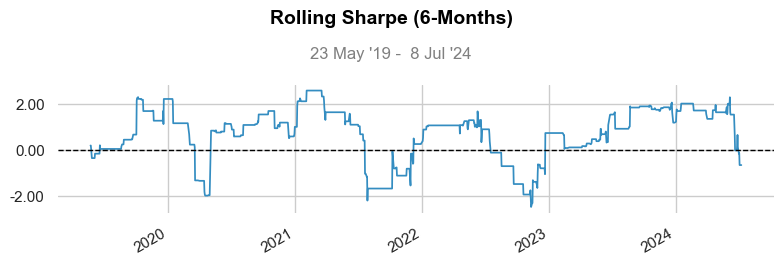

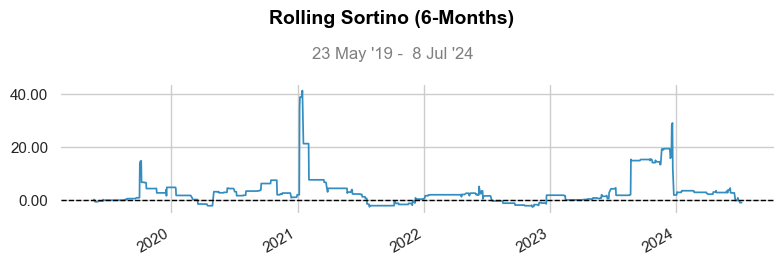

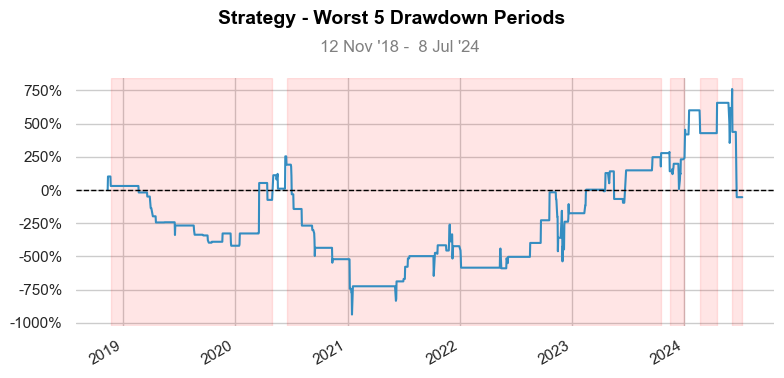

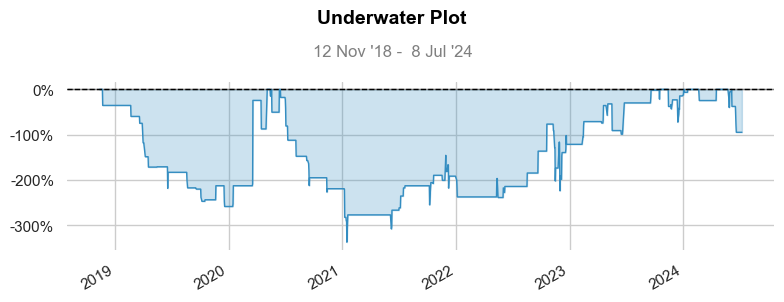

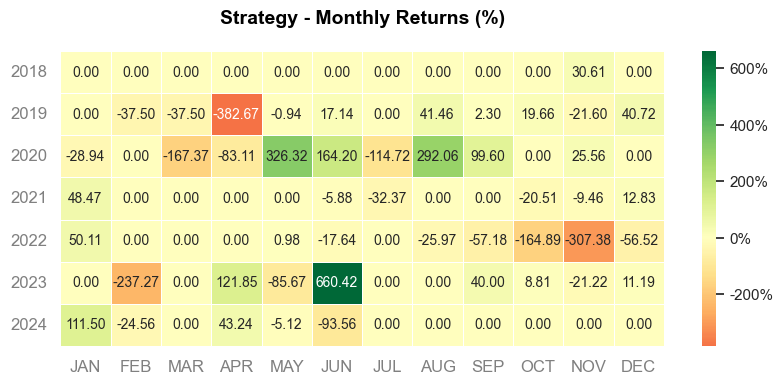

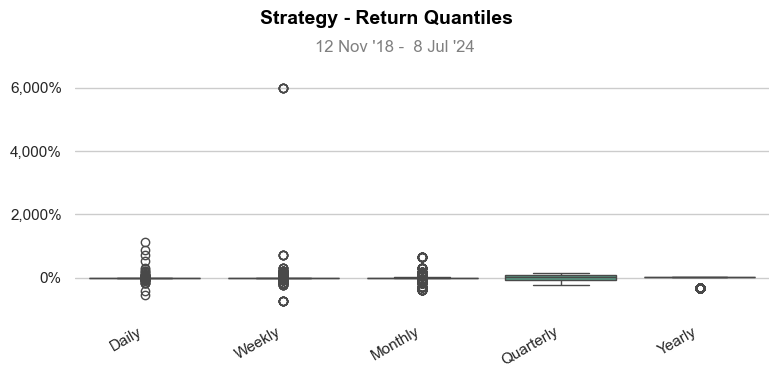

In [56]:
import numpy as np
import pandas as pd
import quantstats as qs

# 初始化存放数据的单位
BS = None  # Buy or Sell
buy = []  # 记录所有买入记录
sell = []  # 记录所有卖出记录
profit_list = [0]  # 未实现损益
profit_fee_list = [0]  # 扣除交易费后的未实现损益
profit_fee_list_realized = []  # 实现的损益

# 定义交易策略函数（生成信号）
def foreign_investors(df):
    # df['large_long_amount_diff'] = df['large_long_amount'].diff(periods= 36)
    # df['large_short_amount_diff'] = df['large_short_amount'].diff(periods = 36 )
    df['ema_long_amt'] = df['large_long_amount'].ewm(span=5, adjust=False).mean().dropna()
    df['ema_short_amt'] = df['large_short_amount'].ewm(span=5, adjust=False).mean().dropna()
    df['sma_long_amt'] = df['large_long_amount'].rolling(window=18).mean().dropna()
    df['sma_short_amt'] = df['large_short_amount'].rolling(window=18).mean().dropna()


    # 計算斜率（即差分）
    df['ema_long_slope'] = df['ema_long_amt'].diff(5) / 5
    df['ema_short_slope'] = df['ema_short_amt'].diff(5) / 5



    # 判斷斜率是否同時增加
    df['slope_increasing'] = (df['ema_long_slope'] > df['ema_long_slope'].shift(1)) & (df['ema_short_slope'] > df['ema_short_slope'].shift(1))
    df['slope_changed'] = (df['ema_long_slope'] < df['ema_long_slope'].shift(1)) | (df['ema_short_slope'] < df['ema_short_slope'].shift(1))
    # 初始化信号和仓位大小
    df['signal'] = 0
    df['position_size'] = 0
    
    position = 0
    
    # for i in range(1, len(df)):
    #     if df['large_long_amount'].iloc[i] > 0 and df['large_short_amount'].iloc[i] > 0:
    #             if position == 0:  # 开新仓（买入）
    #                 df['signal'].iloc[i + 1] = 1
    #                 df['position_size'].iloc[i + 1] = 1
    #                 position = 1
            
    #     elif df['large_long_amount'].iloc[i] < 0 or df['large_short_amount'].iloc[i] < 0:
    #         if position == 1:  # 结束多仓（卖出）
    #             df['signal'].iloc[i + 1] = -1
    #             df['position_size'].iloc[i + 1] = 0
    #             position = 0
    
    # return df

    for i in range(1, len(df)):
        if df['slope_increasing'].iloc[i] and df['ema_long_amt'].iloc[i] > df['sma_long_amt'].iloc[i] and df['ema_short_amt'].iloc[i] > df['sma_short_amt'].iloc[i]:
            if position == 0:  # 开新仓（买入）
                df['signal'].iloc[i + 1] = 1
                df['position_size'].iloc[i + 1] = 1
                position = 1
            
     
        elif df['slope_changed'].iloc[i]:
            if position == 1:  # 结束多仓（卖出）
                df['signal'].iloc[i + 1] = -1
                df['position_size'].iloc[i + 1] = 0
                position = 0
    
    return df
    
    
# 处理只做多的交易逻辑
def trade_logic_long_only(df, feePaid=0):
    
    global BS
    t = 0
    

    for i in range(len(df)):
        # 检查是否到达最后一天，跳出循环
        if i == len(df) - 1:
            break

        # 进场逻辑（只做多）
        entryLong = df['signal'].iloc[i] == 1
        entryCondition = df.index[i].date() not in settlementDate  # 结算日不进场

        # 出场逻辑
        exitSignal = df['signal'].iloc[i] == -1 

        exitCondition = df.index[i].date() in settlementDate 

        # 做多逻辑
        # if BS == 'B':
        #     stopLoss = df['close'].iloc[i] <= df['open'].iloc[t] * (1 - K)
        #     stopProfit = df['close'].iloc[i] >= df['open'].iloc[t] * (1 + K)

        # 未进场时不计算损益
        if BS is None:
            profit_list.append(0)
            profit_fee_list.append(0)

            # 确认进场（只做多）
            if entryLong and entryCondition:
                BS = 'B'
                t = i
                buy.append(t)
                print(f"Buy Price: {df['open'].iloc[t]}, time: {df.index[t]}")

        # 进场后计算未实现损益
        elif BS == 'B':
            profit = 200 * (df['open'].iloc[i + 1] - df['open'].iloc[i])
            profit_list.append(profit)

            # 达到出场条件
            if i == len(df) - 2 or exitCondition or exitSignal:
                pl_round = 200 * (df['open'].iloc[i + 1] - df['open'].iloc[t])
                profit_fee = profit - feePaid * 2
                profit_fee_list.append(profit_fee)
                sell.append(i + 1)
                BS = None
                print(f"Sell Price: {df['open'].iloc[i + 1]}, time: {df.index[i + 1]}")
                print("Trade completed\n")

                # 实现损益
                profit_fee_realized = pl_round - feePaid * 2
                profit_fee_list_realized.append(profit_fee_realized)
            else:
                profit_fee = profit
                profit_fee_list.append(profit_fee)

    equity = pd.DataFrame({'profit': np.cumsum(profit_list), 'profitfee': np.cumsum(profit_fee_list)}, index=df.index)
    return equity  # 确保返回 equity

# 假设 df 已经加载并准备好
df = foreign_investors(df)

# 选择执行只做多或只做空的策略
equity = trade_logic_long_only(df)  # 执行只做多的策略
# equity = trade_logic_short_only(df)  # 执行只做空的策略

# 计算收益率并生成回测报告
ret = equity['profitfee'].pct_change(periods=1).dropna()
print(ret)
qs.reports.full(ret)
